In [5]:
from main import Main
from plot_data import plot_data, plot_runs
import matplotlib.pyplot as plt

Multiple experiments need to be tried out. This notebook will be used to document the whole process.

First starting with the basic FNN on Warehouse.
Parameters: num_fc_units: [640, 256]

log files and model:
output03-29-2021-18-07-36.txt
Warehouse_03-29-2021-18-07-36.pt

command: `main.py --env-name "Warehouse" --yaml-file FNN --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1 --num-processes 8 --num-steps 4 --num-mini-batch 32 --log-interval 30 --use-linear-lr-decay --entropy-coef 0.01  --cuda-deterministic`


LSTM network on Warehouse
Parameters: num_fc_units: [640]

IAM network on Warehouse (Didn't have the A matrix yet)

Parameters: num_fc_units: [512, 256], rnn_units: [128]
(num-processes should be equal to num-mini-batch)
command: `main.py --env-name "Warehouse" --yaml-file IAM_static --recurrent-policy --num-processes 8 --num-steps 8 --num-mini-batch 8 --log-interval 30 --use-linear-lr-decay --entropy-coef 0.01 --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1  --cuda-deterministic`

In [27]:
args = "--env-name Warehouse --yaml-file IAM_static --recurrent-policy --num-processes 1 --num-steps 8 --num-mini-batch 1 --log-interval 30 --use-linear-lr-decay --entropy-coef 0.01 --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1"
arg_list = args.split(" ")
main = Main(arg_list)
main.run()

Currently using configfile:  configs/warehouse/IAM_static.yaml
Log file:  data/output04-10-2021-14-39-38.txt
Starting new run: with args Namespace(algo='ppo', alpha=0.99, clip_param=0.1, cuda=False, cuda_deterministic=False, entropy_coef=0.01, env_name='Warehouse', eps=1e-05, eval_interval=None, fnn_hidden_sizes=[512, 256], gae_lambda=0.95, gail=False, gail_batch_size=128, gail_epoch=5, gail_experts_dir='./gail_experts', gamma=0.99, log_dir='/tmp/gym/', log_interval=30, lr=0.00025, max_grad_norm=0.5, num_env_steps=4000000.0, num_mini_batch=1, num_processes=1, num_steps=8, ppo_epoch=4, rec_hidden_size=None, recurrent_policy=True, save_dir='./trained_models/', save_interval=100, seed=1, use_gae=True, use_linear_lr_decay=True, use_proper_time_limits=False, value_loss_coef=1.0, yaml_file='IAM_static')
And parameters: {'env_type': 'warehouse', 'num_frames': 1, 'influence': True, 'attention': False, 'automatic_dpatch': False, 'manual_dpatch': True, 'inf_num_predictors': 73, 'dset': [0, 1, 2,

KeyboardInterrupt: 

In [ ]:
# Trained IAM model: Missing total training time.
# This was one of the first runs. Using a GRU as RNN
plot_data("output03-29-2021-19-53-54.txt")

IAM dynamic network on Breakout

In [ ]:
args = "--env-name BreakoutNoFrameskip-v4 --yaml-file IAM_static --fnn-hidden-sizes 256 --rec-hidden-size 256 --recurrent-policy --num-processes 8 --num-steps 8 --num-mini-batch 1 --cuda-deterministic --log-interval 30 --use-linear-lr-decay --entropy-coef 0.01 --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1"
arg_list = args.split(" ")
main = Main(arg_list)
main.run()

In [ ]:
# Trained IAM model with static d set. Which is currently a linear layer which process the input by calling it with input as parameter.
# Doesnt work well :(
plot_data("output03-31-2021-23-16-25.txt")


In [ ]:
plot_data("output03-31-2021-20-56-12.txt")

In [ ]:
# Redoing IAM network on Warehouse with IAMBase model this time including the A matrix. But still not sure if correctly implemented.
# --env-name Warehouse --yaml-file IAM_static --fnn-hidden-sizes 256 --recurrent-policy --num-processes 8 --num-steps 8 --num-mini-batch 1 --log-interval 30 --use-linear-lr-decay --entropy-coef 0.01 --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1 --cuda-deterministic
plot_data("output03-31-2021-22-39-40.txt")

In [ ]:
# Redoing IAM network on Warehouse with IAMBase model with reduced hidden rnn size of 25
# --env-name Warehouse --yaml-file IAM_static --fnn-hidden-sizes 256 --rec-hidden-size 25 --num-processes 8 --num-steps 8 --num-mini-batch 1  --recurrent-policy --log-interval 30 --use-linear-lr-decay --entropy-coef 0.01 --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1
plot_data("output04-02-2021-16-17-06.txt")

In [ ]:


# Loading model and plot weights
import torch
import matplotlib.pyplot as plt
import numpy as np
from reproduction_model import IAMPolicy, IAMBase
# path = 'trained_models\ppo\Warehouse_03-31-2021-23-15-04.pt'
path = 'trained_models\ppo\Warehouse_03-31-2021-23-16-25.pt'
iam_policy: IAMPolicy = torch.load(path)[0]
base: IAMBase = iam_policy.base
# base.static_A_matrix.weight

plt.figure()
agent_pos = base.static_A_matrix.weight.cpu().detach().numpy()
plt.imshow(base.static_A_matrix.weight.cpu().detach().numpy())
plt.show()
item_squares = base.static_A_matrix.bias.cpu().detach().numpy()[49:]
img = np.empty((7,7))
img[0,:] = item_squares[:7]
for i in range(0,5):
    img[i+1,0] = item_squares[7+i*2]
    img[i+1,-1] = item_squares[7+i*2+1]
img[-1,:] = item_squares[24-7:]

for x in range(7):
    for y in range(7):
        img[x,y] += agent_pos[x,y]
plt.imshow(img)
plt.show()

data/output04-06-2021-17-29-07.txt
time_elapsed: 17092 seconds or 284 minutes
Final reward:  33.07692307692305


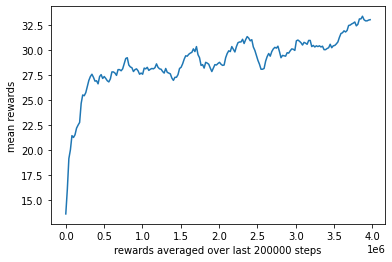

data/output04-06-2021-17-29-07.txt
data/output04-06-2021-23-01-04.txt
data/output04-07-2021-04-04-57.txt
Final reward:  30.73076923076921


C:\Users\gijs-\Code_projects\DeepLearning_Reproducibility_project\plot_data.py:135: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.fill_between(time_steps, lower_bound, upper_bound, alpha=0.3, color=color)


ValueError: Expected 2-dimensional array, got 1

<Figure size 432x288 with 1 Axes>

18158.44777727127

In [12]:
# Running Warehouse IAM-128 3 times with command:
args = "--env-name Warehouse --yaml-file IAM_static --fnn-hidden-sizes 512,256 --rec-hidden-size 128 --algo ppo --recurrent-policy --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1 --num-processes 8 --num-steps 8 --num-mini-batch 8 --log-interval 100 --use-linear-lr-decay --entropy-coef 0.01"

plot_data("output04-06-2021-17-29-07.txt")
# plot_data("output04-06-2021-23-01-04.txt")
# plot_data("output04-07-2021-04-04-57.txt")
plot_runs(["output04-06-2021-17-29-07.txt", "output04-06-2021-23-01-04.txt", "output04-07-2021-04-04-57.txt"], show=True)

In [ ]:
# Run of FNN 3 times with command:

plot_data("output04-07-2021-11-47-30.txt")

In [ ]:
# Combine data of IAM and plot:
average_over_steps = 400000
average_time = plot_runs(["output04-06-2021-17-29-07.txt", "output04-06-2021-23-01-04.txt", "output04-07-2021-04-04-57.txt"],average_over_last_steps=average_over_steps, show=False)
average_time_FNN = plot_runs(["output04-07-2021-11-47-30.txt", "output04-07-2021-15-27-18.txt", "output04-07-2021-19-14-23.txt"],average_over_last_steps=average_over_steps, show=False)
plt.xlabel("IAM and FNN")
plt.show()
print("average_over_steps:", average_over_steps)
# Interesting to see that the IAM model took much more time compared to the FNN
# Also note that there is a lot more variance in the IAM model.
print("Elapsed time average IAM:", average_time//60/60, " Hours")
print("Elapsed time average FNN:", average_time_FNN//60/60, " Hours")

In [ ]:
import torch
# Gijs: I checked and can have a max of 6 threads. Check your computer by calling this in your regular python console: import torch; torch.get_num_threads()
torch.set_num_threads(8)
# Running Warehouse FNN 8 obs 3 times with command:
args = "--env-name Warehouse --yaml-file FNN --fnn-hidden-sizes 640,256 --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1 --num-processes 8 --num-steps 1 --num-mini-batch 8 --log-interval 100 --use-linear-lr-decay --entropy-coef 0.01"
arg_list = args.split(" ")
for i in range(0,3):
    seed_arg = ['--seed', str(10*i)]
    main = Main(arg_list + seed_arg)
    main.run()
    plot_data("output"+main.data_saver.file_name)

In [ ]:
import torch
torch.set_num_threads(8)
args = "--env-name Warehouse --yaml-file IAM_static --fnn-hidden-sizes 512,256 --rec-hidden-size 128 --algo ppo --recurrent-policy --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1 --num-processes 32 --num-steps 8 --num-mini-batch 32 --log-interval 100 --use-linear-lr-decay --entropy-coef 0.01 --cuda-deterministic"
arg_list = args.split(" ")
for i in range(0,3):
    seed_arg = ['--seed', str(10*i)]
    main = Main(arg_list + seed_arg)
    main.run()
    plot_data("output"+main.data_saver.file_name)

In [ ]:
# Running IAM_static with mini batch of 32. Works way better!
plot_data("output04-08-2021-08-23-05.txt")

In [ ]:
# Running single GRU-128 3 times minibatch 8
average_time_GRU = plot_runs(["output04-08-2021-13-41-34.txt", "output04-08-2021-17-47-32.txt", "output04-08-2021-21-51-57.txt"], show=True)
print(average_time_GRU)


IAM-128:
data/output04-06-2021-17-29-07.txt
data/output04-06-2021-23-01-04.txt
data/output04-07-2021-04-04-57.txt
Final reward:  30.718954248366014
average_time_IAM: 5.033333333333333
FNN 8 obs:
data/output04-07-2021-11-47-30.txt
data/output04-07-2021-15-27-18.txt
data/output04-07-2021-19-14-23.txt
Final reward:  28.97354497354498
average_time_FNN: 3.816666666666667
GRU:
data/output04-08-2021-13-41-34.txt
data/output04-08-2021-17-47-32.txt
data/output04-08-2021-21-51-57.txt
Final reward:  33.592592592592574
average_time_GRU 4.066666666666666
FNN 1 obs:
data/output04-10-2021-20-30-00.txt
data/output04-10-2021-22-41-04.txt
data/output04-11-2021-00-52-00.txt
Final reward:  37.05208333333332
average_time_fnn_1obs 2.183333333333333


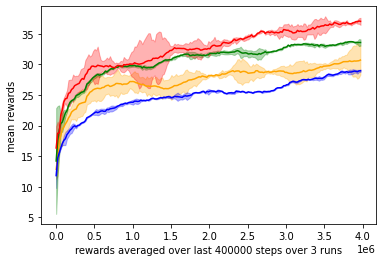

In [10]:
#Combining all all have mini batch of 8
average_over_steps = 400000
print("IAM-128:")
average_time_IAM = plot_runs(["output04-06-2021-17-29-07.txt", "output04-06-2021-23-01-04.txt", "output04-07-2021-04-04-57.txt"],average_over_last_steps=average_over_steps, show=False, color='orange')
print("average_time_IAM:", average_time_IAM//60/60)
print("FNN 8 obs:")
average_time_FNN_8 = plot_runs(["output04-07-2021-11-47-30.txt", "output04-07-2021-15-27-18.txt", "output04-07-2021-19-14-23.txt"],average_over_last_steps=average_over_steps, show=False, color='blue')
print("average_time_FNN:", average_time_FNN_8//60/60)
# plot_data("output04-08-2021-08-23-05.txt", show=False)
print("GRU:")
average_time_GRU = plot_runs(["output04-08-2021-13-41-34.txt", "output04-08-2021-17-47-32.txt", "output04-08-2021-21-51-57.txt"],average_over_last_steps=average_over_steps, show=False, color='green')
print("average_time_GRU", average_time_GRU//60/60)
# 3 runs of the fnn with 1 observation
print("FNN 1 obs:")
average_time_fnn_1obs = plot_runs(["output04-10-2021-20-30-00.txt", "output04-10-2021-22-41-04.txt", "output04-11-2021-00-52-00.txt"],average_over_last_steps=average_over_steps, show=False, color='red')
print("average_time_fnn_1obs",average_time_fnn_1obs//60/60)
plt.savefig('page/images/minibatch8')

GRU:
data/output04-09-2021-09-38-00.txt
data/output04-09-2021-13-24-28.txt
data/output04-09-2021-17-06-24.txt
Final reward:  49.9375
average_time_GRU: 3.816666666666667
IAM-128:
data/output04-08-2021-08-23-05.txt
data/output04-14-2021-01-11-00.txt
data/output04-14-2021-06-04-36.txt
Final reward:  48.18750000000002
average_time_IAM: 4.85
FNN 1 obs:
data/output04-13-2021-09-12-27.txt
Final reward:  47.31250000000003
average_time_FNN 1 obs: 3.5166666666666666
FNN 8 obs:
data/output04-15-2021-14-07-17.txt
Final reward:  45.00000000000001
average_time_FNN 8 obs: 4.266666666666667


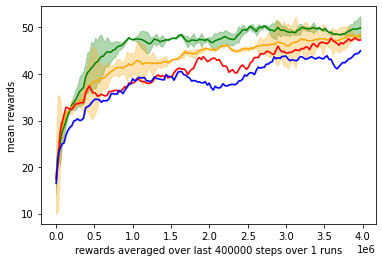

In [9]:
# GRU and IAM run with minibatch 32 average_over_steps = 400000
average_over_steps = 400000
print("GRU:")
average_time_GRU_batch32 = plot_runs(["output04-09-2021-09-38-00.txt", "output04-09-2021-13-24-28.txt", "output04-09-2021-17-06-24.txt"], average_over_last_steps=average_over_steps, show=False, color='g')
print("average_time_GRU:", average_time_GRU_batch32//60/60)
#IAM also minibatch 32
print("IAM-128:")
average_time_IAM_batch32 = plot_runs(["output04-08-2021-08-23-05.txt", "output04-14-2021-01-11-00.txt", "output04-14-2021-06-04-36.txt"], average_over_last_steps=average_over_steps, color='orange', show=False)
print("average_time_IAM:", average_time_IAM_batch32//60/60)
# FNN 1 observation minibatch 32
print("FNN 1 obs:")
average_time_FNN_1 = plot_runs(["output04-13-2021-09-12-27.txt"], average_over_last_steps=average_over_steps, color='red',show=False)
print("average_time_FNN 1 obs:", average_time_FNN_1//60/60)
# FNN 8 observations minibatch 32
print("FNN 8 obs:")
average_time_FNN_8 = plot_runs(["output04-15-2021-14-07-17.txt"], average_over_last_steps=average_over_steps, color='blue',show=False)
print("average_time_FNN 8 obs:", average_time_FNN_8//60/60)
plt.savefig('page/images/minibatch32.png')

In [25]:
import torch
torch.set_num_threads(8)
args = "--env-name Warehouse --yaml-file IAM_static --fnn-hidden-sizes 512,256 --rec-hidden-size 128 --algo ppo --recurrent-policy --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1 --num-processes 32 --num-steps 8 --num-mini-batch 32 --log-interval 100 --use-linear-lr-decay --entropy-coef 0.01"
arg_list = args.split(" ")
for i in range(1,3):
    seed_arg = ['--seed', str(10*i)]
    main = Main(arg_list + seed_arg)
    main.run()

Currently using configfile:  configs/warehouse/IAM_static.yaml
Log file:  data/output04-15-2021-12-23-39.txt
Starting new run: with args Namespace(algo='ppo', alpha=0.99, clip_param=0.1, cuda=False, cuda_deterministic=False, entropy_coef=0.01, env_name='Warehouse', eps=1e-05, eval_interval=None, fnn_hidden_sizes=[512, 256], gae_lambda=0.95, gail=False, gail_batch_size=128, gail_epoch=5, gail_experts_dir='./gail_experts', gamma=0.99, log_dir='/tmp/gym/', log_interval=100, lr=0.00025, max_grad_norm=0.5, num_env_steps=4000000.0, num_mini_batch=32, num_processes=32, num_steps=8, ppo_epoch=4, rec_hidden_size=128, recurrent_policy=True, save_dir='./trained_models/', save_interval=100, seed=10, use_gae=True, use_linear_lr_decay=True, use_proper_time_limits=False, value_loss_coef=1.0, yaml_file='IAM_static')
And parameters: {'env_type': 'warehouse', 'num_frames': 1, 'influence': True, 'attention': False, 'automatic_dpatch': False, 'manual_dpatch': True, 'inf_num_predictors': 73, 'dset': [0, 1,

KeyboardInterrupt: 